In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [10]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
x = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [13]:
model = LogisticRegression()

In [14]:
model.fit(x_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  0]
 [37  0]]


In [23]:
model.score(x_train,y_train)

0.6466666666666666

In [24]:
model.score(x,y)

0.6425

In [27]:
tn , fp ,fn , tp = confusion_matrix(y_test,y_pred).ravel()

In [28]:
print(tn , fp ,fn , tp)

63 0 37 0


In [29]:
a = accuracy_score(y_test,y_pred)
a

0.63

In [30]:
err = 1-a
err

0.37

In [31]:
precision_score(y_test,y_pred)

0.0

In [32]:
recall_score(y_test,y_pred)

0.0

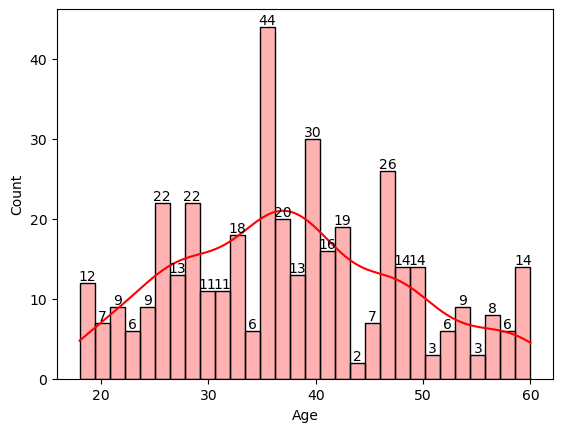

In [33]:
histplot = sns.histplot(df['Age'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

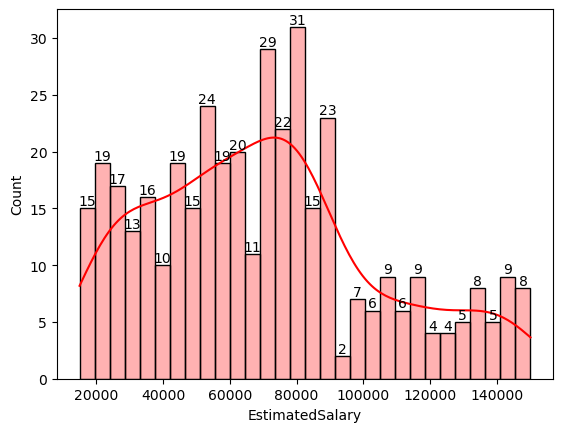

In [34]:
histplot = sns.histplot(df['EstimatedSalary'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

In [35]:
df["Gender"].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [36]:
def gender_encoder(value):
    if (value == "Male"):
        return 1
    elif (value == "Female"):
        return 0
    else:
        return -1

In [37]:
df["Gender"] = df["Gender"].apply(gender_encoder)

In [38]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

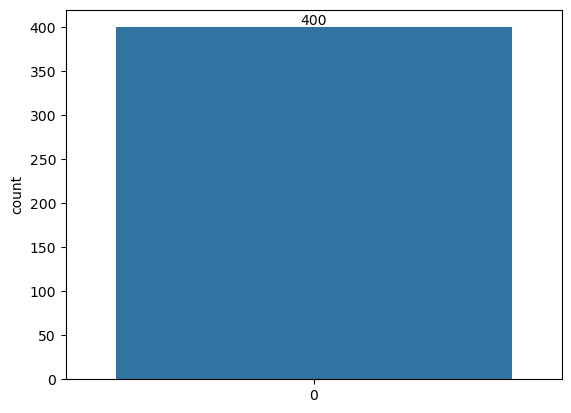

In [39]:
countplot = sns.countplot(df["Purchased"])
for i in countplot.containers:
    countplot.bar_label(i,)
plt.show()

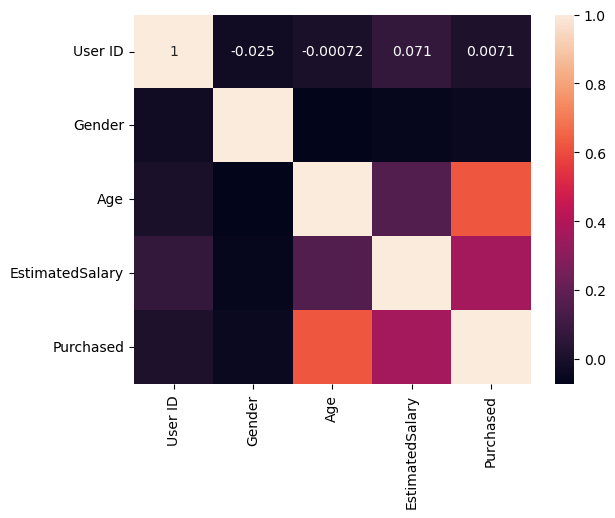

In [41]:
sns.heatmap(df.corr(), annot=True)
plt.show()